In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iphone.csv")   #taking the dataset
print(df.head())

   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0


In [3]:
df.isnull().sum() #checking for missing values

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [4]:
# Distributing dependent and independent variable

x = df.iloc[:,:-1].values  # x contains independent variable 
y = df.iloc[:,3].values    # y contains dependent variable "Purchase iPhone"

In [5]:
# Converting categorical variable into numbers 

from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
x[:,0] = le_gender.fit_transform(x[:,0])

In [6]:
# Splitting data into train and test for KNN

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state = 0)  # here splitting testing set to 25%

In [7]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler  # StandardScaler is use to do Feature Transformation with mean = 0 and 
                                                  # std deviation = 1 
sc = StandardScaler()
# In "fit", we are computing the mean and std-deviation in case of StandardScalar; 
# In "transform" we are applying entire formula in each and every data points.
x_train_scalar = sc.fit_transform(x_train)  
x_test_scalar = sc.transform(x_test)  # Data which will use in Making Predictions

In [8]:
# Implementing k-NN Classifier [Model Building]

from sklearn.neighbors import KNeighborsClassifier

# for Euclidean distance we use p = 2 and specify metric as minkowski
c = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p =2) # Here, the model will only learn parameters and weight
c.fit(x_train_scalar,y_train)  # Learn from I/P and O/P data and sets its parameter and weight

KNeighborsClassifier()

In [9]:
# Accuracy in Training dataset is 91.67%

c.score(x_train_scalar,y_train)

0.9166666666666666

In [10]:
# Making Predictions

y_pred = c.predict(x_test_scalar)  # It will do the prediction of new data and give us the O/P

In [11]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred) #Creating Confusion Matrix; to compare predicted result with the actual result
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) # Checking accuracy of a model
print("Accuracy score:", accuracy)
precision = metrics.precision_score(y_test,y_pred) # Precision score is % of predicted postive events that are actually positive
print("Precision score:", precision)
recall = metrics.recall_score(y_test,y_pred) # Recall score is the % of positive events that we predicted correctly
print("Recall score:", recall)

[[64  4]
 [ 3 29]]
Accuracy score: 0.93
Precision score: 0.8787878787878788
Recall score: 0.90625


<b>Accuracy Score</b> = (TP+TN)/(TP+TN+FP+FN)<br><br>
<b>Recall Score</b> = TP/(TP+FN)<br><br>
<b>Precision Score</b> = TP/(TP+FP)

We get an accuracy of 93%  and only 7 that is 3+4 incorrect predictions were made.<br><br>

64 --> True Negative i.e,; Person has not bought an iPhone and predicted value also says the same<br>
4 --> Flase Positive i.e,; Person has not bought an iPhone but the predicted value says they did buy<br>
3 --> Flase Negative i.e,; Person has bought an iPhone but the predicted value says they did not buy<br>
29 --> True Positive i.e,; Person has bought an iPhone and the predicted value also says they bought<br>

In [12]:
# Predicting whether Gender "Female" with age 47 and Salary 40000 will purchase iPhone. 

c.predict([[1,47,30000]])

array([1], dtype=int64)

The output is 1; which means according to our model the person will purchase an iPhone.

#### Now checking the performance of testing and training dataset for different n_neighbors values. I will choose 1 - 20.

In [13]:
training_accuracy = []
testing_accuracy = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train_scalar, y_train)
    training_accuracy.append(knn.score(x_train_scalar,y_train))
    testing_accuracy.append(knn.score(x_test_scalar,y_test))

After running this code I got the training and testing accuracy for different n_neighbors

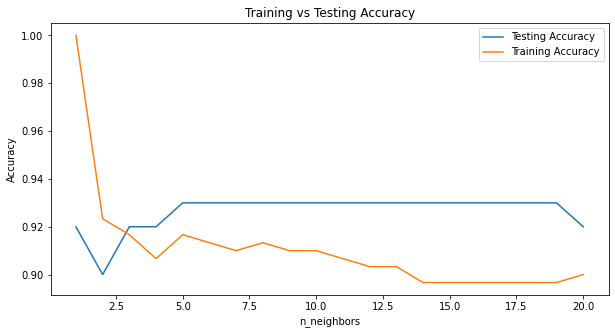

In [14]:
# Plotting test, train accuracy with n_neighbors

plt.figure(figsize=(10,5))
plt.plot(range(1,21), testing_accuracy, label = "Testing Accuracy")
plt.plot(range(1,21), training_accuracy, label = "Training Accuracy")
plt.title('Training vs Testing Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

#### Analyzing the graph above

In the beginning when n_neighbor were 1,2 training accuracy was lot higher than the testing accuracy. So, the model was suffering from overfitting.<br><br>
After that the training and testing accuracy become closer and thats the spot that we wanted. <br><br>
Moving forward, when the n_neighbor got higher, the testing accuracy acquire a constant value of about 93% and training accuracy gradually went down from n_neighbour = 5; which we do not need.<br><br>
Therefore, from the above graph the n_neighbour for this particular dataset and model should be 3.